### Considering the column_diagnosis.arff dataset available at the course webpage’s homework tab. Using sklearn, apply a 10-fold stratified cross-validation with shuffling (random_state=0) for the assessment of predictive models along this section.

### 1) [3v] Compare the performance of 𝑘NN with 𝑘 = 5 and naïve Bayes with Gaussian assumption (consider all remaining parameters for each classifier as sklearn’s default):

### a. Plot two boxplots with the fold accuracies for each classifier.

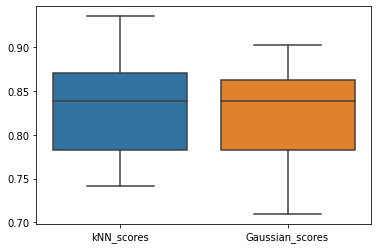

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import StratifiedKFold

from scipy.io.arff import loadarff
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the ARFF file
data = loadarff('column_diagnosis.arff')
df = pd.DataFrame(data[0])
df['class'] = df['class'].str.decode('utf-8')

X = df.drop('class', axis=1)
y = df['class']
print

# kNN
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X, y)

# Bayesian
gnb = GaussianNB()
gnb.fit(X, y)


cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

# Cross-validation for kNN
knn_scores = cross_val_score(neigh, X, y, cv=cv)

# Cross-validation for Gaussian Naive Bayes
gnb_scores = cross_val_score(gnb, X, y, cv=cv)


# Boxplot 
data = pd.DataFrame({
    'label1': "Knn",
    'kNN_scores': knn_scores,
    'label2': "Gnb",
    'Gaussian_scores': gnb_scores
})

sns.boxplot(data=data)

# Show the plot
plt.show()

### b. Using scipy, test the hypothesis “𝑘NN is statistically superior to naïve Bayes regarding accuracy”, asserting whether is true.

In [10]:
from scipy import stats

res = stats.ttest_rel(knn_scores, gnb_scores, alternative='greater')
print("knn > gnb ? p-value=",res.pvalue)

res = stats.ttest_rel(knn_scores, gnb_scores, alternative='less')
print("knn < gnb ? p-value=",res.pvalue)

res = stats.ttest_rel(knn_scores, gnb_scores, alternative='two-sided')
print("knn != gnb ? p-value=",res.pvalue)

knn > gnb ? p-value= 0.19042809062064092
knn < gnb ? p-value= 0.8095719093793591
knn != gnb ? p-value= 0.38085618124128184


      Baseado nestes p-values e usando um nível de significância de 0.05, não há uma diferença estatisticamente significativa entre os modelos kNN e naive Bayes. Desta forma, não podemos afirmar com confiança que um modelo é superior ao outro, relativamente ao dataset column-diagnosis.

### 2) [2.5v] Consider two 𝑘NN predictors with 𝑘 = 1 and 𝑘 = 5 (uniform weights, Euclidean distance, all remaining parameters as default). Plot the differences between the two cumulative confusion matrices of the predictors. Comment.

Confusion Matrix for KNN (k=1):
[[ 60   0   0]
 [  0 100   0]
 [  0   0 150]]

Confusion Matrix for KNN (k=5):
[[ 45  15   0]
 [ 12  85   3]
 [  2   3 145]]


<AxesSubplot:>

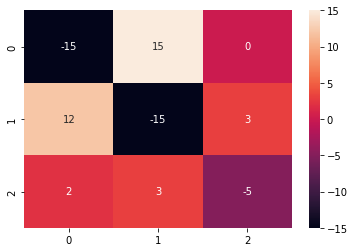

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

# Create and fit a KNN model with k=1
knn1 = KNeighborsClassifier(n_neighbors=1, weights='uniform', metric='euclidean')
knn1.fit(X, y)
knn1_pred = knn1.predict(X)

# Create and fit a KNN model with k=5
knn5 = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric="euclidean")
knn5.fit(X, y)
knn5_pred = knn5.predict(X)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)


# Calculate confusion matrices for both models
confusion_matrix_knn1 = confusion_matrix(y, knn1_pred)
confusion_matrix_knn5 = confusion_matrix(y, knn5_pred)

print("Confusion Matrix for KNN (k=1):")
print(confusion_matrix_knn1)

print("\nConfusion Matrix for KNN (k=5):")
print(confusion_matrix_knn5)

sns.heatmap(confusion_matrix_knn5 - confusion_matrix_knn1, annot=True, fmt='g')

### 3) [1.5v] Considering the unique properties of column_diagnosis, identify three possible difficulties of naïve Bayes when learning from the given dataset.

Disadvantages

This algorithm faces the ‘zero-frequency problem’ where it assigns zero probability to a categorical variable whose category in the test data set wasn’t available in the training dataset. It would be best if you used a smoothing technique to overcome this issue.
Its estimations can be wrong in some cases, so you shouldn’t take its probability outputs very seriously. 

1 - O dataset trabalha com várias variáveis relacionadas entre si. Naive Bayes assume que todos os parâmetros são independentes, o que leva a uma menor precisão em relação ao dataset.

In [16]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Hernia
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Hernia
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Hernia
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Hernia
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Hernia
